In [598]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

### Loading the data

In [599]:
import h5py
def load_data():
    train_dataset = h5py.File('./trainset.hdf5',"r")
    X_train = np.array(train_dataset["X_train"][:])
    y_train = np.array(train_dataset["Y_train"][:])
    test_dataset = h5py.File("./testset.hdf5","r")
    X_test = np.array(test_dataset["X_test"][:])
    y_test = np.array(test_dataset["Y_test"][:])
    return X_train,X_test,y_train,y_test

In [600]:
X_train,X_test,y_train,y_test = load_data()

In [601]:
# X,y = make_blobs(n_samples=200,n_features=2,centers=2)
# y = y.reshape(y.shape[0],1)
# m = X.shape[0]
# n = X.shape[1]

In [602]:
print(X_train.shape)
print(y_train.shape)

(1000, 64, 64)
(1000, 1)


## Standardizing and raveling the images

In [603]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
X_train_raveled = np.zeros(shape=(X_train.shape[0],4096))
for i in range(X_train_raveled.shape[0]):
    X_train_raveled[i] = X_train[i].ravel()
X_train_raveled = scaler.fit_transform(X_train_raveled)
print(X_train_raveled.shape)
X_test_raveled = np.zeros(shape=(X_test.shape[0],4096))
for i in range(X_test_raveled.shape[0]):
    X_test_raveled[i] = X_test[i].ravel()
X_test_raveled = scaler.transform(X_test_raveled)
print(X_test_raveled.shape)

(1000, 4096)
(200, 4096)


## Sigmoid

In [604]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

## Initializing the vector W, and the real number b

In [605]:
def initialize(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

#### Creating our mapping function given the parameters W,b

In [606]:
def model(X,W,b):
    Z = np.dot(X,W) + b
    return sigmoid(Z)

### Log Loss function for Logistic regression

In [607]:
def log_loss(A,y):
    m = y.shape[0]
    epsilon = 1e-15
    return -1 / m * np.sum(y * np.log(A+epsilon) + (1 - y) * np.log(1 - A+epsilon))

### Calculation dW, db with vectorization

In [608]:
def gradients(X,A,y):
    m = X.shape[0]
    dW = 1/m * np.dot(X.T,A-y)
    db = 1/m * np.sum(A-y)
    return (dW,db)

### Update W,b respectively 

In [609]:
def update(W,b,dW,db,learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)

### Predicting input data 

In [610]:
def predict(X,W,b):
    A = model(X,W,b)
    return A>=0.5

In [611]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

##### First neuron, returns the best W,b parameters fitting our data

In [612]:
def neuron(X_train,y_train,X_test,y_test,n_iter = 10000,learning_rate = 0.01):
    W,b = initialize(X_train)
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    for i in tqdm(range(n_iter)): # TQDM: progress bar during iterations
        A = model(X_train,W,b)
        if i % 10 == 0:
          # keeping track of the train data accuracy and loss based on current W and b
          train_accuracy.append(accuracy_score(y_train,predict(X_train,W,b)))
          train_loss.append(log_loss(A,y_train))
          # keeping track of the test data accuracy and loss based on current W and b
          A_test = model(X_test,W,b)
          test_loss.append(log_loss(A_test,y_test))
          test_accuracy.append(accuracy_score(y_test,predict(X_test,W,b)))
        dW, db = gradients(X_train,A,y_train)
        W,b = update(W,b,dW,db,learning_rate=learning_rate)
    plt.subplot(1,2,1)
    plt.plot(train_loss,label = "Train Loss")
    plt.plot(test_loss,label = "Test Loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_accuracy,label = "Train Accuracy")
    plt.plot(test_accuracy,label = "Test Accuracy")
    plt.legend()
    return (W,b)

100%|██████████| 10000/10000 [01:09<00:00, 144.00it/s]


parameters:
W
[[ 0.56407448]
 [-0.43740175]
 [ 0.17835836]
 ...
 [-0.8428539 ]
 [-1.03236674]
 [ 0.08340422]]
b
[0.57857099]



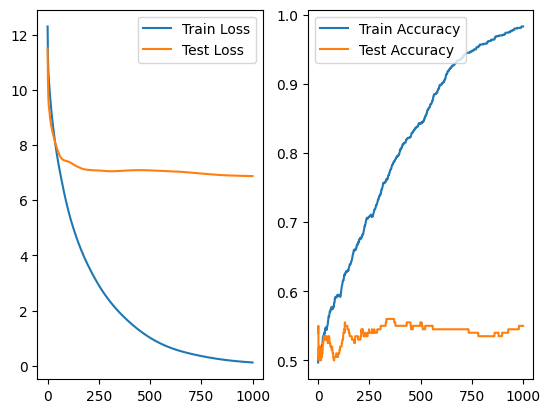

In [613]:
W,b = neuron(X_train_raveled,y_train,X_test_raveled,y_test)
print("parameters:\nW\n{}\nb\n{}\n".format(W,b))

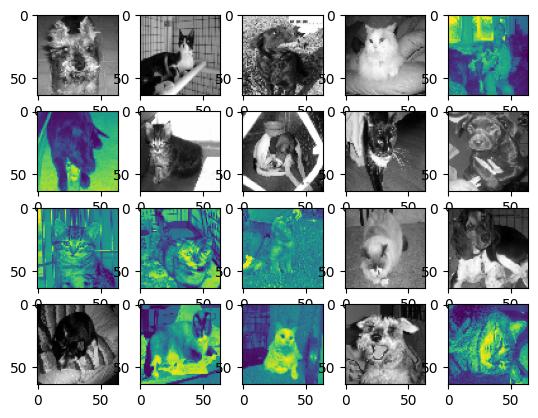

In [614]:
n_test = 20
n_rows = 4
n_cols = 5 
for i in range(n_test):
 plt.subplot(n_rows,n_cols,i+1)
 pred = predict(X_test_raveled[i],W,b)
 if(pred == False):
  plt.imshow(X_test[i],cmap='gray')
 else:
  plt.imshow(X_test[i])